<a href="https://colab.research.google.com/github/Palak-Malhotra/Asteroids/blob/main/NASA%20/Nasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

import tensorflow as tf

from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

# Read the dataset
df = pd.read_csv('nasa.csv')

# Handling missing values
df.isnull().sum()




Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [ ]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df.tail()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False
4686,3772978,3772978,19.109,0.400641,0.895860,400.640618,895.859655,0.248946,0.556661,1314.437764,...,187.642183,653.679098,0.876110,222.436688,2.071980,2.458319e+06,184.820424,0.550729,J2000,False


In [ ]:
# Extracting all column names
column_names = df.columns
print(column_names)


Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')


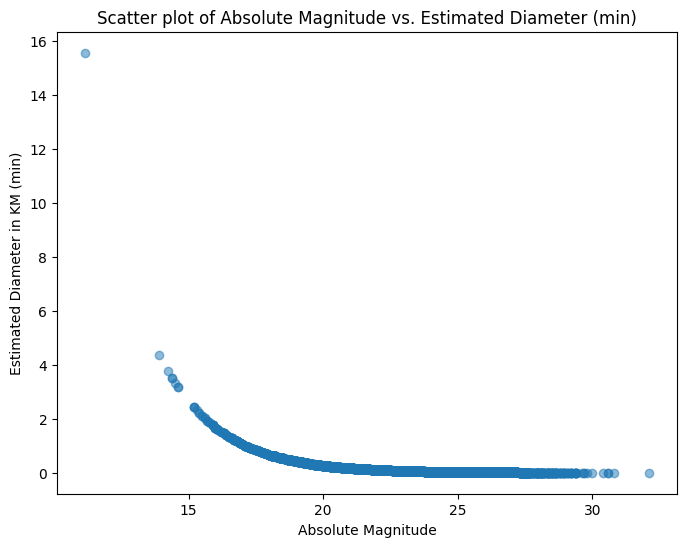

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Absolute Magnitude'], df['Est Dia in KM(min)'], alpha=0.5)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Estimated Diameter in KM (min)')
plt.title('Scatter plot of Absolute Magnitude vs. Estimated Diameter (min)')
plt.show()


# **Scatter plot of 'Absolute Magnitude' vs. 'Est Dia in KM(min)':**

This scatter plot shows the relationship between the absolute magnitude of asteroids and their estimated diameter in kilometers (minimum). Each point represents an asteroid, with its position on the plot determined by its absolute magnitude and estimated diameter. It helps in understanding if there's any correlation between the brightness of an asteroid (absolute magnitude) and its size.

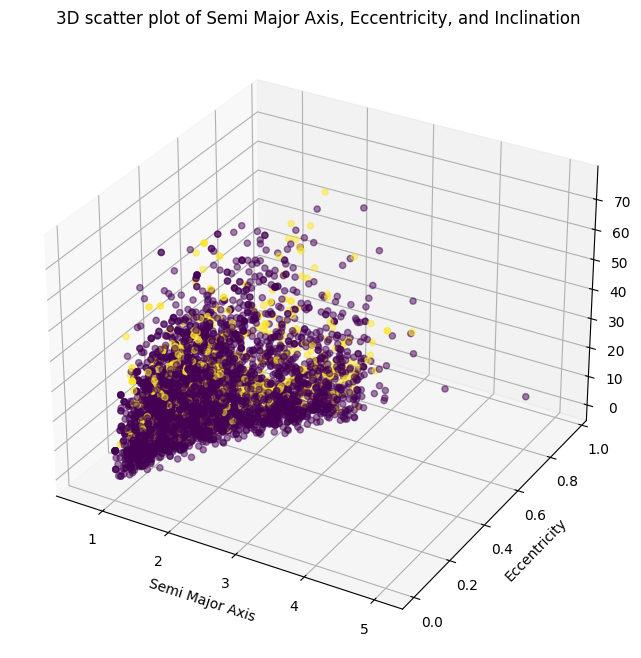

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Semi Major Axis'], df['Eccentricity'], df['Inclination'], c=df['Hazardous'], cmap='viridis', alpha=0.5)
ax.set_xlabel('Semi Major Axis')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Inclination')
plt.title('3D scatter plot of Semi Major Axis, Eccentricity, and Inclination')
plt.show()


# **3D scatter plot of 'Semi Major Axis', 'Eccentricity', and 'Inclination':**

This 3D scatter plot visualizes the relationships between the semi-major axis, eccentricity, and inclination of asteroid orbits. Each point in the plot represents an asteroid, and its position is determined by its orbital parameters. The color of the points indicates whether the asteroid is hazardous or not. It helps in understanding the distribution of asteroids in orbital space based on their orbital characteristics.

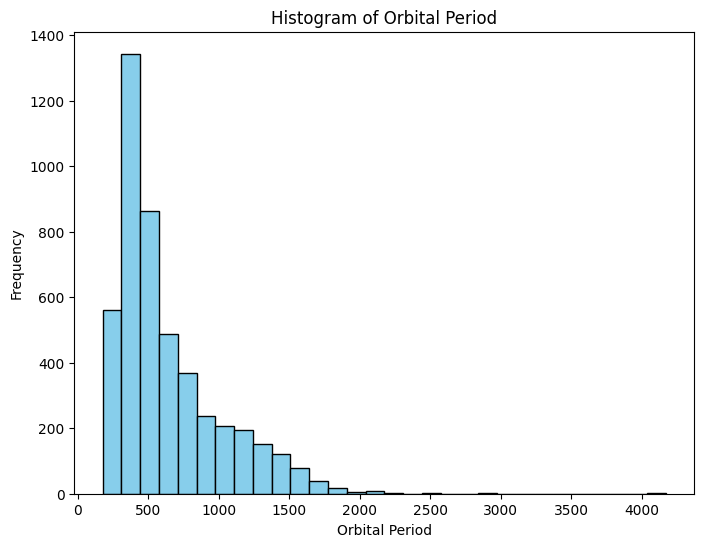

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Orbital Period'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Orbital Period')
plt.ylabel('Frequency')
plt.title('Histogram of Orbital Period')
plt.show()


# **Histogram of 'Orbital Period':**

This histogram displays the distribution of orbital periods of asteroids. It shows how frequently different ranges of orbital periods occur among the asteroids in the dataset. The histogram helps in understanding the typical orbital periods of asteroids and identifying any patterns or clusters in their orbital dynamics.

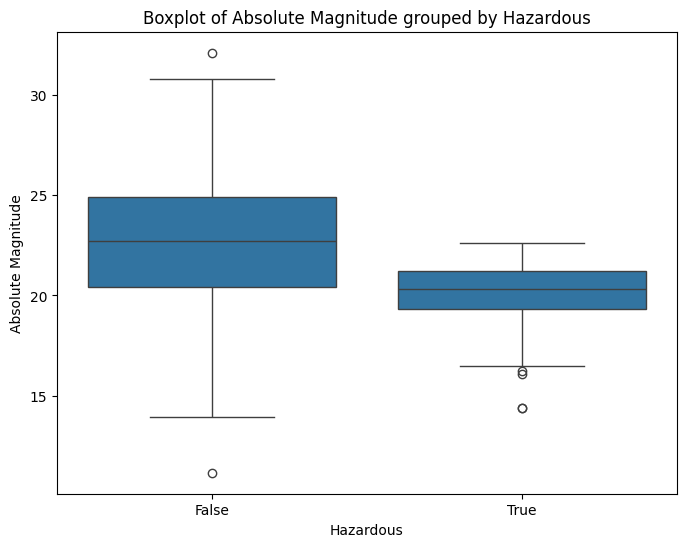

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hazardous', y='Absolute Magnitude', data=df)
plt.xlabel('Hazardous')
plt.ylabel('Absolute Magnitude')
plt.title('Boxplot of Absolute Magnitude grouped by Hazardous')
plt.show()


# **Box plot of 'Absolute Magnitude' grouped by 'Hazardous':**

This box plot displays the distribution of absolute magnitudes for hazardous and non-hazardous asteroids. The box plot provides information about the central tendency, variability, and skewness of the absolute magnitudes within each group (hazardous and non-hazardous). It helps in comparing the brightness distribution of asteroids categorized by their hazard status.

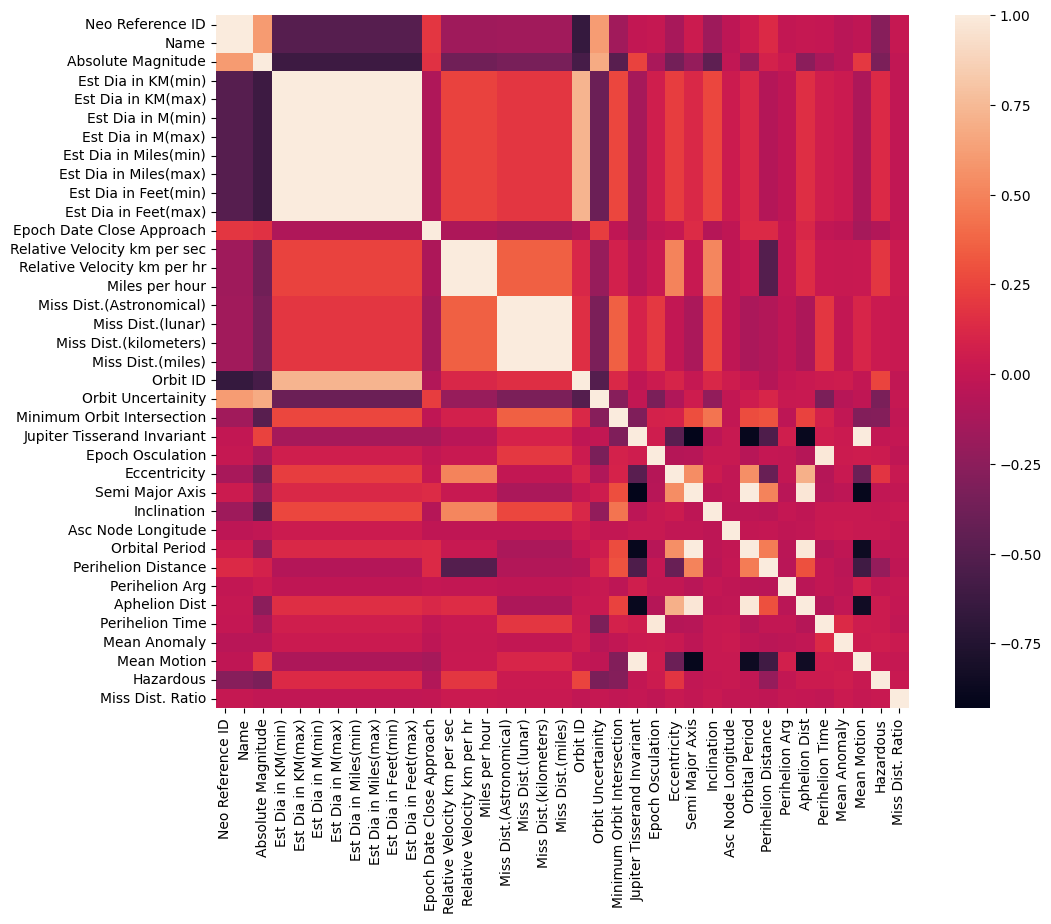

Baseline Accuracy for Test Set = 0.8389161510561126
Baseline Accuracy for Train Set = 0.8389161510561126



In [ ]:
# Mapping 'Hazardous' column to binary values
df['Hazardous'] = df['Hazardous'].map({True: 1, False: 0})

# Dropping unnecessary columns
df.drop(['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox'], axis=1, inplace=True)

df['Miss Dist. Ratio'] = np.where(df['Miss Dist.(miles)'] != 0,
                                  df['Miss Dist.(kilometers)'] / df['Miss Dist.(miles)'],
                                  np.nan)

# Visualizing correlation matrix
corrmat = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

# Baseline accuracy calculation
baseline_accuracy_test = df['Hazardous'].value_counts(normalize=True)[0]
baseline_accuracy_train = df['Hazardous'].value_counts(normalize=True)[0]
print("Baseline Accuracy for Test Set =", baseline_accuracy_test)
print("Baseline Accuracy for Train Set =", baseline_accuracy_train)
print()

In [ ]:
# Splitting the dataset
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Function to evaluate classifiers
def evaluate_classifier(clf, name):
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    accuracy_train = (cm_train[1][1] + cm_train[0][0]) / len(y_train)
    accuracy_test = (cm_test[1][1] + cm_test[0][0]) / len(y_test)
    print('Accuracy of {} for Train Set = {}'.format(name, accuracy_train))
    print('Accuracy of {} for Test Set = {}'.format(name, accuracy_test))
    print()

# Evaluating classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

for name, clf in classifiers.items():
    print("Classifier:", name)
    evaluate_classifier(clf, name)

Classifier: Naive Bayes
Accuracy of Naive Bayes for Train Set = 0.8372899439850627
Accuracy of Naive Bayes for Test Set = 0.8454157782515992

Classifier: SVC
Accuracy of SVC for Train Set = 0.8372899439850627
Accuracy of SVC for Test Set = 0.8454157782515992

Classifier: Decision Tree
Accuracy of Decision Tree for Train Set = 1.0
Accuracy of Decision Tree for Test Set = 0.9925373134328358

Classifier: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 610, number of negative: 3139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7939
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162710 -> initscore=-1.638201
[Light

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
# Define and train the CatBoost model
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

0:	learn: 0.4927668	total: 12.1ms	remaining: 12.1s
100:	learn: 0.0017125	total: 1.42s	remaining: 12.6s
200:	learn: 0.0013267	total: 2.85s	remaining: 11.3s
300:	learn: 0.0012645	total: 3.67s	remaining: 8.51s
400:	learn: 0.0012641	total: 4.48s	remaining: 6.69s
500:	learn: 0.0012522	total: 5.33s	remaining: 5.3s
600:	learn: 0.0011527	total: 6.17s	remaining: 4.1s
700:	learn: 0.0011470	total: 7s	remaining: 2.99s
800:	learn: 0.0011443	total: 7.81s	remaining: 1.94s
900:	learn: 0.0010611	total: 8.68s	remaining: 954ms
999:	learn: 0.0009536	total: 9.54s	remaining: 0us
Train Accuracy: 1.0
Test Accuracy: 0.9925373134328358


In [ ]:
from xgboost import XGBClassifier
# Define and train the XGBoost model
model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, verbosity=1)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9997332622032542
Test Accuracy: 0.9936034115138592


Epoch 1/50
24/24 [==============================] - 3s 12ms/step - loss: 0.4205 - accuracy: 0.8263 - val_loss: 0.3229 - val_accuracy: 0.8467
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.8566 - val_loss: 0.2633 - val_accuracy: 0.8840
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2668 - accuracy: 0.8740 - val_loss: 0.2257 - val_accuracy: 0.9053
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2274 - accuracy: 0.8926 - val_loss: 0.1925 - val_accuracy: 0.9253
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1927 - accuracy: 0.9150 - val_loss: 0.1611 - val_accuracy: 0.9320
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1768 - accuracy: 0.9200 - val_loss: 0.1492 - val_accuracy: 0.9400
Epoch 7/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1616 - accuracy: 0.9290 - val_loss: 0.1306 - val_accuracy: 0.9493
Epoch 8/50
24/24 [=

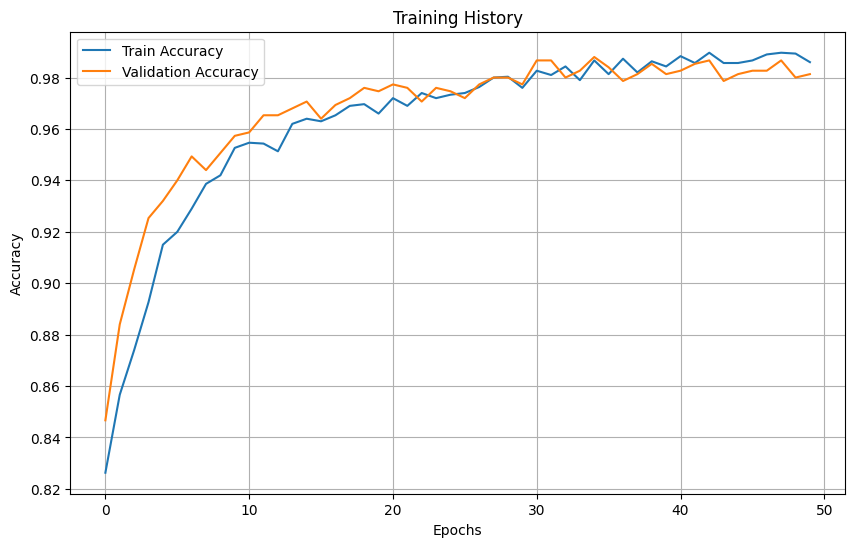

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the neural network model with adjusted architecture
num_features = X_train_scaled.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with adjusted hyperparameters
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with increased number of epochs
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
